# Installing Connector

In [1]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


# Connecting database

In [2]:
import mysql.connector
from mysql.connector import Error
 
 
def connectSql():
    """ Connect to MySQL database """
    try:
        conn = mysql.connector.connect(host='localhost',
                                       database='electricvehicledb',
                                       user='Happy',
                                       password='Happy007',port=3306)
        if conn.is_connected():
            print('Connected to MySQL database')
 
    except Error as e:
        print(e)
 
    finally:
        conn.close()
 
 
if __name__ == '__main__':
    connectSql()

Connected to MySQL database


# creating table 

In [ ]:
CREATE TABLE ev_data (
    vin VARCHAR(50) PRIMARY KEY,
    county VARCHAR(50),
    city VARCHAR(50),
    state VARCHAR(2),
    postal_code VARCHAR(10),
    model_year INT,
    make VARCHAR(50),
    model VARCHAR(50),
    electric_vehicle_type VARCHAR(100),
    cafv_eligibility VARCHAR(100),
    electric_range INT,
    base_msrp DECIMAL(10, 2),
    legislative_district INT,
    dol_vehicle_id BIGINT,
    vehicle_location VARCHAR(255),
    electric_utility VARCHAR(255),
    census_tract VARCHAR(50)
);

# creating a new table and inserting columns


In [22]:
import mysql.connector

# Database connection details
db_config = {
    'host': 'localhost',  # Update with your database host
    'user': 'Happy',       # Update with your database username
    'password': 'Happy007',  # Update with your database password
    'database': 'electricvehicledb'   # Ensure this database exists
}

# SQL query to create the ev_data table
create_table_query = """
CREATE TABLE ev_details (
    vin VARCHAR(50) ,
    county VARCHAR(50),
    city VARCHAR(50),
    state VARCHAR(2),
    postal_code VARCHAR(10),
    model_year INT,
    make VARCHAR(50),
    model VARCHAR(50),
    electric_vehicle_type VARCHAR(100),
    cafv_eligibility VARCHAR(100),
    electric_range INT,
    base_msrp DECIMAL(10, 2),
    legislative_district INT,
    dol_vehicle_id BIGINT,
    vehicle_location VARCHAR(255),
    electric_utility VARCHAR(255),
    census_tract VARCHAR(50)
);
"""

# Connect to the database and create the table

    # Establish connection
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()
    
    # Execute the query
cursor.execute(create_table_query)
print("Table ev_data created successfully!")
    

conn.close()

ProgrammingError: 1050 (42S01): Table 'ev_details' already exists

In [16]:
cursor.close()
conn.close()

# inserting csv file data into databse

In [24]:
import mysql.connector
import pandas as pd


# Load CSV data
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")
df = df.dropna()

# Connect to MySQL database
conn = mysql.connector.connect(
    host="localhost",         # e.g., "localhost" or IP address
    user="Happy",
    password="Happy007",
    database="electricvehicledb"
)
cursor = conn.cursor()

# Insert data into the database
for index, row in df.iterrows():
    sql = """
    INSERT INTO ev_details (
        vin, county, city, state, postal_code, model_year, make, model,
        electric_vehicle_type, cafv_eligibility, electric_range, base_msrp,
        legislative_district, dol_vehicle_id, vehicle_location, electric_utility, census_tract
    ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """
    cursor.execute(sql, tuple(row))

# Commit and close connection
conn.commit()
cursor.close()
conn.close()

# checking whether the data is connected succesfully by retreving

In [25]:
import mysql.connector
import pandas as pd

# Connect to MySQL database
conn = mysql.connector.connect(
    host="localhost",         # e.g., "localhost" or IP address
    user="Happy",
    password="Happy007",
    database="electricvehicledb"
)
query = "SELECT * FROM ev_details"
df = pd.read_sql(query, conn)

# Display data
print(df)

# Close connection
conn.close()

C:\Users\aynay\AppData\Local\Temp\ipykernel_9292\484567326.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


               vin     county           city state postal_code  model_year  \
0       5YJYGDEE1L       King        Seattle    WA     98122.0        2020   
1       7SAYGDEE9P  Snohomish        Bothell    WA     98021.0        2023   
2       5YJSA1E4XK       King        Seattle    WA     98109.0        2019   
3       5YJSA1E27G       King       Issaquah    WA     98027.0        2016   
4       5YJYGDEE5M     Kitsap      Suquamish    WA     98392.0        2021   
...            ...        ...            ...   ...         ...         ...   
177468  7SAYGDEE3N     Pierce    Bonney Lake    WA     98391.0        2022   
177469  KM8K23AG1P      Mason        Shelton    WA     98584.0        2023   
177470  5YJYGDEE6M      Grant         Quincy    WA     98848.0        2021   
177471  WVGKMPE27M       King  Black Diamond    WA     98010.0        2021   
177472  5YJ3E1EA8M     Pierce         Tacoma    WA     98422.0        2021   

              make          model           electric_vehicle_ty

# List of counties

In [1]:
import mysql.connector
import pandas as pd

# Connect to MySQL database
conn = mysql.connector.connect(
    host="localhost",         # e.g., "localhost" or IP address
    user="Happy",
    password="Happy007",
    database="electricvehicledb"
)
query = "SELECT DISTINCT County FROM ev_details;"
df1 = pd.read_sql(query, conn)

# Display data
print(df1)

# Close connection
conn.close()

C:\Users\aynay\AppData\Local\Temp\ipykernel_13336\374338198.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql(query, conn)


          County
0           King
1      Snohomish
2         Kitsap
3       Thurston
4         Yakima
5         Island
6         Chelan
7         Skagit
8        Spokane
9    Walla Walla
10         Grant
11       Stevens
12       Whitman
13      Kittitas
14  Pend Oreille
15         Clark
16       Cowlitz
17     Jefferson
18       Clallam
19     Klickitat
20        Pierce
21  Grays Harbor
22       Whatcom
23      Skamania
24     Wahkiakum
25        Benton
26      Franklin
27         Lewis
28      San Juan
29         Mason
30      Okanogan
31       Douglas
32         Adams
33       Pacific
34        Asotin
35      Columbia
36       Lincoln
37         Ferry
38      Garfield


# Retrieve list of cities

In [4]:
import mysql.connector
import pandas as pd

# Connect to MySQL database
conn = mysql.connector.connect(
    host="localhost",         # e.g., "localhost" or IP address
    user="Happy",
    password="Happy007",
    database="electricvehicledb"
)
query = "SELECT DISTINCT City FROM ev_details;"
df2 = pd.read_sql(query, conn)

# Display data
print(df2)

# Close connection
conn.close()

C:\Users\aynay\AppData\Local\Temp\ipykernel_13336\3245952059.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql(query, conn)


                City
0            Seattle
1            Bothell
2           Issaquah
3          Suquamish
4               Yelm
..               ...
463  Alderwood Manor
464         Lakeview
465        Klickitat
466         Maryhill
467    Prairie Ridge

[468 rows x 1 columns]


# top 10 models with highest electric range

In [9]:
import mysql.connector
import pandas as pd

# Connect to MySQL database
conn = mysql.connector.connect(
    host="localhost",         # e.g., "localhost" or IP address
    user="Happy",
    password="Happy007",
    database="electricvehicledb"
)
query = """SELECT `make`, `model`, MAX(`electric_range`) AS Max_electric_range
FROM ev_details
GROUP BY `make`, `model`
ORDER BY MAX(`electric_range`) DESC
LIMIT 10;
"""
df3 = pd.read_sql(query, conn)

# Display data
print(df3)

# Close connection
conn.close()

C:\Users\aynay\AppData\Local\Temp\ipykernel_13336\2446206932.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql(query, conn)


        make     model  Max_electric_range
0      TESLA   MODEL S                 337
1      TESLA   MODEL 3                 322
2      TESLA   MODEL X                 293
3      TESLA   MODEL Y                 291
4  CHEVROLET   BOLT EV                 259
5    HYUNDAI      KONA                 258
6      TESLA  ROADSTER                 245
7        KIA      NIRO                 239
8     JAGUAR    I-PACE                 234
9   POLESTAR       PS2                 233


# List of Counties with the Number of Electric Vehicles

In [10]:
import mysql.connector
import pandas as pd

# Connect to MySQL database
conn = mysql.connector.connect(
    host="localhost",         # e.g., "localhost" or IP address
    user="Happy",
    password="Happy007",
    database="electricvehicledb"
)
query = """SELECT `County`, COUNT(*) AS Vehicle_Count
FROM ev_details
GROUP BY `County`
ORDER BY Vehicle_Count DESC;
"""
df4 = pd.read_sql(query, conn)

# Display data
print(df4)

# Close connection
conn.close()

C:\Users\aynay\AppData\Local\Temp\ipykernel_13336\4135881262.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df4 = pd.read_sql(query, conn)


          County  Vehicle_Count
0           King          92740
1      Snohomish          21001
2         Pierce          13782
3          Clark          10409
4       Thurston           6428
5         Kitsap           5840
6        Spokane           4586
7        Whatcom           4253
8         Benton           2147
9         Skagit           1910
10        Island           1882
11       Clallam           1058
12        Chelan           1047
13        Yakima            995
14     Jefferson            974
15      San Juan            942
16       Cowlitz            897
17         Mason            823
18         Lewis            739
19  Grays Harbor            625
20      Kittitas            623
21      Franklin            585
22         Grant            561
23   Walla Walla            437
24       Douglas            364
25       Whitman            334
26     Klickitat            284
27      Okanogan            263
28       Stevens            219
29       Pacific            198
30      

# Average Electric Range by Vehicle Make

In [11]:
import mysql.connector
import pandas as pd

# Connect to MySQL database
conn = mysql.connector.connect(
    host="localhost",         # e.g., "localhost" or IP address
    user="Happy",
    password="Happy007",
    database="electricvehicledb"
)
query = """SELECT `make`, AVG(`electric_range`) AS Avg_electric_range
FROM ev_details
GROUP BY `Make`
ORDER BY Avg_electric_range DESC;
"""
df4 = pd.read_sql(query, conn)

# Display data
print(df4)

# Close connection
conn.close()

C:\Users\aynay\AppData\Local\Temp\ipykernel_13336\451091277.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df4 = pd.read_sql(query, conn)


                    make  Avg_electric_range
0                 JAGUAR            203.7414
1   WHEEGO ELECTRIC CARS            100.0000
2                  TH!NK            100.0000
3              CHEVROLET             94.6002
4                   FIAT             85.6454
5                 NISSAN             80.3457
6                  TESLA             77.2840
7                  SMART             62.3259
8         AZURE DYNAMICS             56.0000
9                   AUDI             51.0484
10                 HONDA             46.5993
11               PORSCHE             44.8663
12                   KIA             44.6821
13              POLESTAR             37.5551
14                   BMW             34.7237
15            ALFA ROMEO             33.0000
16              CHRYSLER             32.2110
17                 DODGE             32.0000
18            MITSUBISHI             30.6552
19                TOYOTA             28.0902
20                 MAZDA             25.7815
21        

# Electric Vehicles with Base MSRP Over $50,000

In [12]:
import mysql.connector
import pandas as pd

# Connect to MySQL database
conn = mysql.connector.connect(
    host="localhost",         # e.g., "localhost" or IP address
    user="Happy",
    password="Happy007",
    database="electricvehicledb"
)
query = """SELECT `Make`, `Model`, `base_msrp`
FROM ev_details
WHERE `base_msrp` > 50000
ORDER BY `base_msrp` DESC;
"""
df5 = pd.read_sql(query, conn)

# Display data
print(df5)

# Close connection
conn.close()

C:\Users\aynay\AppData\Local\Temp\ipykernel_13336\2557468578.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df5 = pd.read_sql(query, conn)


         Make     Model  base_msrp
0     PORSCHE       918   845000.0
1     PORSCHE  PANAMERA   184400.0
2     PORSCHE  PANAMERA   184400.0
3     PORSCHE  PANAMERA   184400.0
4     PORSCHE  PANAMERA   184400.0
...       ...       ...        ...
2212      BMW      530E    52650.0
2213      BMW      530E    52650.0
2214      BMW      530E    52650.0
2215      BMW      530E    52650.0
2216      BMW      530E    52650.0

[2217 rows x 3 columns]


#  Top 10 Newest Electric Vehicles

In [16]:
import mysql.connector
import pandas as pd

# Connect to MySQL database
conn = mysql.connector.connect(
    host="localhost",         # e.g., "localhost" or IP address
    user="Happy",
    password="Happy007",
    database="electricvehicledb"
)
query = """SELECT DISTINCT `Make`, `Model`, `model_year`, `electric_range`
FROM ev_details
ORDER BY `model_year` DESC, `electric_range` DESC
LIMIT 10;
"""
df6 = pd.read_sql(query, conn)

# Display data
print(df6)

# Close connection
conn.close()

C:\Users\aynay\AppData\Local\Temp\ipykernel_13336\3204459731.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df6 = pd.read_sql(query, conn)


            Make              Model  model_year  electric_range
0     LAND ROVER        RANGE ROVER        2024              59
1     LAND ROVER  RANGE ROVER SPORT        2024              59
2  MERCEDES-BENZ          GLE-CLASS        2024              48
3         TOYOTA         RAV4 PRIME        2024              42
4          VOLVO                S60        2024              41
5          VOLVO                V60        2024              41
6            BMW                 X5        2024              39
7         TOYOTA        PRIUS PRIME        2024              39
8     MITSUBISHI          OUTLANDER        2024              38
9          VOLVO                S90        2024              38


# Top 5 Cities with the Most Electric Vehicles

In [17]:
import mysql.connector
import pandas as pd

# Connect to MySQL database
conn = mysql.connector.connect(
    host="localhost",         # e.g., "localhost" or IP address
    user="Happy",
    password="Happy007",
    database="electricvehicledb"
)
query = """SELECT `City`, COUNT(*) AS Vehicle_Count
FROM ev_details
GROUP BY `City`
ORDER BY Vehicle_Count DESC
LIMIT 5;

"""
df7 = pd.read_sql(query, conn)

# Display data
print(df7)

# Close connection
conn.close()

C:\Users\aynay\AppData\Local\Temp\ipykernel_13336\2129405797.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df7 = pd.read_sql(query, conn)


        City  Vehicle_Count
0    Seattle          29447
1   Bellevue           8930
2    Redmond           6478
3  Vancouver           6193
4    Bothell           5863


# no of columns

In [4]:
import pandas as pd

# Read the CSV file
ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

# Show basic information about the DataFrame
print("Shape of DataFrame (rows, columns):", ev_data.shape)
print("\nColumns in the DataFrame:", list(ev_data.columns))

Shape of DataFrame (rows, columns): (177866, 17)

Columns in the DataFrame: ['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility', '2020 Census Tract']


# Top ev Manufacturers

C:\Users\aynay\AppData\Local\Temp\ipykernel_14828\2877912096.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makes.values, y=top_makes.index, palette='viridis')


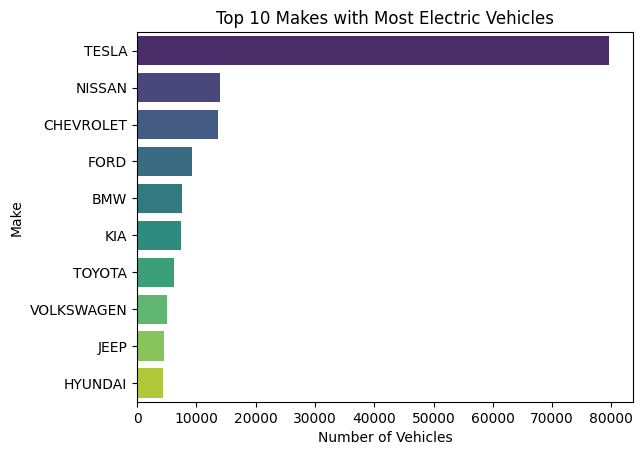

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'ev_data' contains your dataset
ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

# Corrected variable name
top_makes = ev_data['Make'].value_counts().head(10)
sns.barplot(x=top_makes.values, y=top_makes.index, palette='viridis')
plt.title('Top 10 Makes with Most Electric Vehicles')
plt.xlabel('Number of Vehicles')
plt.ylabel('Make')
plt.show()


# Pie chart distribution of vehilces

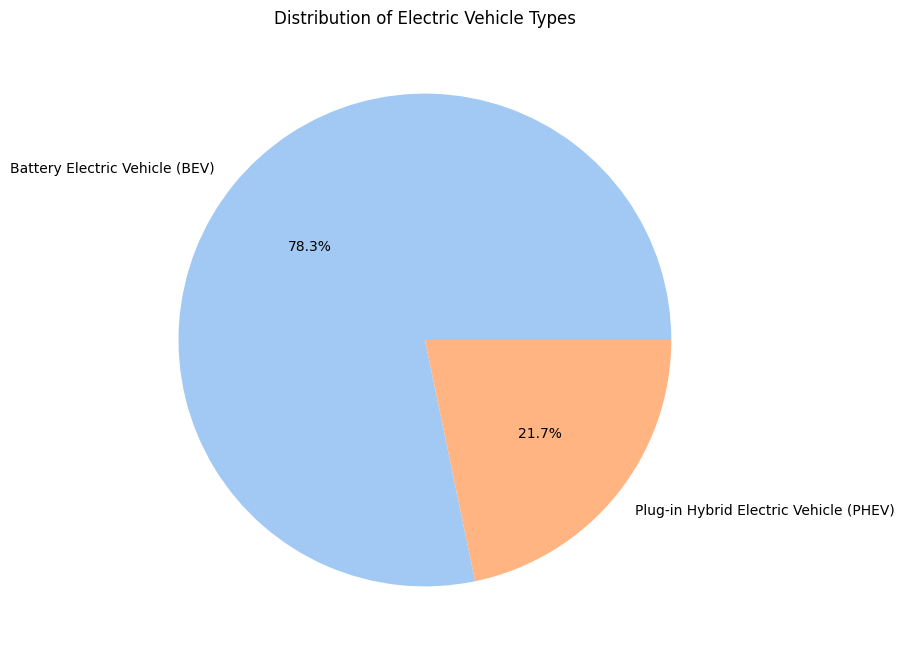

In [9]:
# Ensure you have imported the necessary libraries and loaded your dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (if not already done)
ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

# Check if the column exists
if 'Electric Vehicle Type' in ev_data.columns:
    ev_types = ev_data['Electric Vehicle Type'].value_counts()

    # Plot the pie chart
    ev_types.plot.pie(
        autopct='%1.1f%%', 
        figsize=(8, 8), 
        colors=sns.color_palette('pastel')
    )
    plt.title('Distribution of Electric Vehicle Types')
    plt.ylabel('')  # Remove default y-axis label
    plt.show()
else:
    print("Column 'Electric Vehicle Type' not found in the dataset.")


# Scatterplot for range and model year

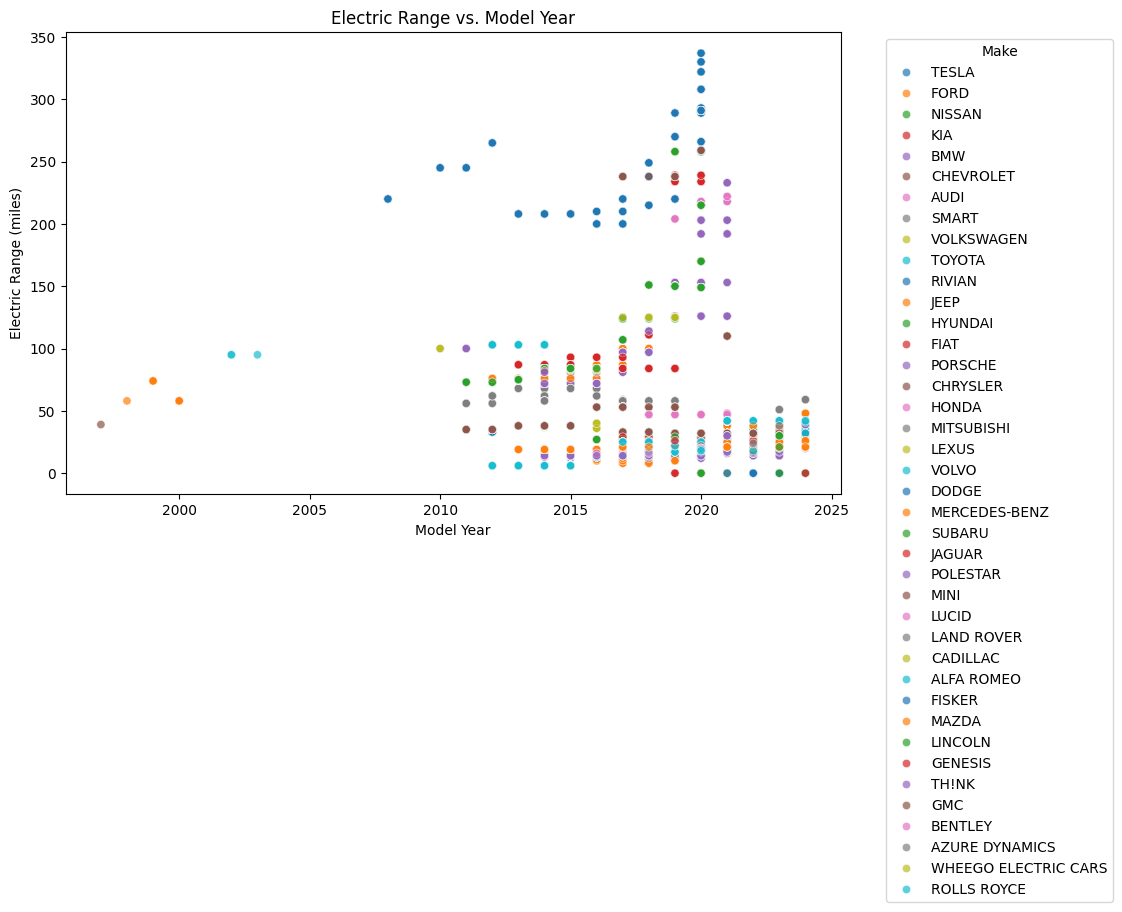

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ev_data, x='Model Year', y='Electric Range', hue='Make', palette='tab10', alpha=0.7)
plt.title('Electric Range vs. Model Year')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Heatmap for top 5 Electric Range ny Brand

C:\Users\aynay\AppData\Local\Temp\ipykernel_14828\1333422609.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='Make', y='Electric Range', palette='Set2')


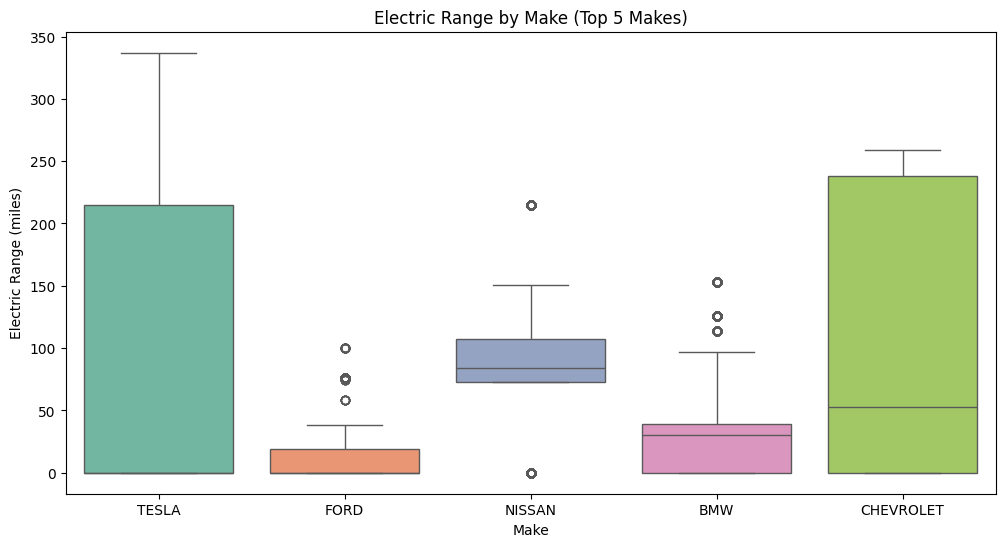

In [11]:
top_5_makes = ev_data['Make'].value_counts().head(5).index
filtered_data = ev_data[ev_data['Make'].isin(top_5_makes)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='Make', y='Electric Range', palette='Set2')
plt.title('Electric Range by Make (Top 5 Makes)')
plt.xlabel('Make')
plt.ylabel('Electric Range (miles)')
plt.show()
